# WeatherPy
----

### Analysis
* It is very apparent in this data that the latitude is very strongly correlated with the max temperature in any given city. More specifically, there is a positive correlation between the absolute value of the latitude and the max temperature, meaning as you get further away from the equator, the max temperature increases.
* There seems to be no particular relationship between city latitude and Humidity, with the exception of a dearth of low humidity cities within 20 degrees of the equator. Once you get 20 degrees north or south of the equator, the range of humidity ranges from 40 percent to 100 percent without a strong relationship between latitude and humidity.
* Continents do not seem to very strongly correlate with any of the factors tested here, with the exception of the relationships that already exist with Latitude.
* The data collected for clou cover is discrete, rather than continuous, and as such, it is not clear that the data would demonstrate as strong a relationship as the other factors might. In any case, the data presented do not seem to correlate between cloud cover and latitude.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np
import requests
import datetime
import time
from pprint import pprint

#Import Date of Pull
now =datetime.datetime.now()
date = now.strftime("%m/%d/%Y")

# Import API key
from api_keys import api_key as key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputfile = "output/cities.csv"

#Import continent converting csv and make datafram. 
#This will allow the continents to be displayed in different colors on the graph
cont = pd.read_csv("continent.csv", keep_default_na=False)
cont = cont.rename(index=str, columns={'iso 3166 country':'Country', 'continent code': 'Continent'})

# define units as imperial
units = 'imperial'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pprint(len(cities))

601


In [4]:
#Define the base query url
qurl = "http://api.openweathermap.org/data/2.5/weather?appid=" + key + "&units=" + units + "&q="
# define lists for the variables tracked and the counter for the record count
humid = []
cloud =[]
wind = []
lat = []
lng = []
temp = []
citi = []
country = []
count = 1

# Loop through the city list and collect the variables needed.
# Also add the Error processing to print that it is skipping a city.
for city in cities:
    try:
        resp = requests.get(qurl + city).json()
        lat.append(resp['coord']['lat'])
        lng.append(resp['coord']['lon'])
        temp.append(resp['main']['temp_max'])
        humid.append(resp['main']['humidity'])
        cloud.append(resp['clouds']['all'])
        wind.append(resp['wind']['speed'])
        citi.append(resp['name'])
        country.append(resp['sys']['country'])
        print(f"Processing Record {count} for {city}")
        count = count + 1
    except KeyError:
        print("City not found, skipping")
        continue
# This delay line is probably unnecessary, but it is included so that the API doesn't get locked out.    
       

Processing Record 1 for rikitea
Processing Record 2 for bredasdorp
Processing Record 3 for arlit
Processing Record 4 for port alfred
Processing Record 5 for ushuaia
Processing Record 6 for nizhniy chir
Processing Record 7 for cape town
City not found, skipping
Processing Record 8 for hermanus
Processing Record 9 for batemans bay
Processing Record 10 for san lawrenz
Processing Record 11 for mataura
Processing Record 12 for tiksi
Processing Record 13 for butaritari
Processing Record 14 for beloha
Processing Record 15 for launceston
Processing Record 16 for naron
Processing Record 17 for ahipara
Processing Record 18 for busselton
Processing Record 19 for bluff
Processing Record 20 for carnarvon
Processing Record 21 for belmonte
Processing Record 22 for sur
Processing Record 23 for topolobampo
Processing Record 24 for cam ranh
Processing Record 25 for arraial do cabo
Processing Record 26 for neuquen
Processing Record 27 for ostrovnoy
Processing Record 28 for mitsamiouli
Processing Record 2

Processing Record 212 for kodiak
Processing Record 213 for pitimbu
Processing Record 214 for nabire
Processing Record 215 for pisco
Processing Record 216 for ginda
Processing Record 217 for saint-augustin
Processing Record 218 for iroquois falls
Processing Record 219 for wanlaweyn
Processing Record 220 for adrar
Processing Record 221 for paso de carrasco
Processing Record 222 for aykhal
Processing Record 223 for bilibino
Processing Record 224 for pangkalanbuun
Processing Record 225 for podor
Processing Record 226 for sao filipe
Processing Record 227 for port hardy
City not found, skipping
Processing Record 228 for acajutla
Processing Record 229 for komsomolskiy
Processing Record 230 for tyler
Processing Record 231 for ust-nera
Processing Record 232 for cayenne
City not found, skipping
Processing Record 233 for nueve de julio
Processing Record 234 for pangnirtung
Processing Record 235 for kaitangata
Processing Record 236 for hambantota
Processing Record 237 for galesong
Processing Recor

Processing Record 428 for yeppoon
Processing Record 429 for bo rai
Processing Record 430 for shafranovo
Processing Record 431 for kaeo
Processing Record 432 for syasstroy
Processing Record 433 for gizo
Processing Record 434 for kharan
Processing Record 435 for antalaha
Processing Record 436 for namatanai
Processing Record 437 for krasnozerskoye
Processing Record 438 for mbandaka
Processing Record 439 for sabla
Processing Record 440 for thinadhoo
Processing Record 441 for haftoni
Processing Record 442 for jaisalmer
Processing Record 443 for pshekhskaya
Processing Record 444 for kedrovyy
Processing Record 445 for goderich
Processing Record 446 for gharghoda
Processing Record 447 for ahuimanu
Processing Record 448 for mumford
City not found, skipping
City not found, skipping
Processing Record 449 for bulawayo
Processing Record 450 for zirandaro
City not found, skipping
Processing Record 451 for kikwit
Processing Record 452 for russell
Processing Record 453 for kloulklubed
Processing Recor

In [5]:
# Create dataframe of data collecting through the API calls
data = pd.DataFrame(
    {'City': citi,
    'Cloud Cover': cloud,
    'Country': country,
    'Humidity': humid,
    'Latitude': lat,
    'Longitude': lng,
    'Temperature': temp,
    'Wind Speed': wind})

#merge the dataframe from the API calls with the continent dataframe to add a column with the continent value.
data2=data.merge(cont, on='Country', how='left')
data2.to_csv(outputfile)
data2.head()

,City,Cloud Cover,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed,Continent
0,Rikitea,76,PF,100,-23.12,-134.97,77.27,14.67,OC
1,Bredasdorp,0,ZA,68,-34.53,20.04,68.00,13.87,AF
2,Arlit,0,NE,21,18.74,7.39,91.85,6.17,AF
3,Port Alfred,8,ZA,84,-33.59,26.89,64.99,1.99,AF
4,Ushuaia,90,AR,69,-54.81,-68.31,39.20,23.04,SA


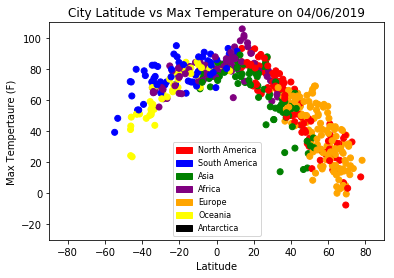

In [13]:
# This dictionary will allow us to map different continents to different colors in the plot. It's fun!
colors = {'NA': 'r', 'SA': 'b', 'AS': 'g', 'AF': 'purple', 'EU': 'orange', 'OC': 'yellow', 'AN': 'black'}

#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2.Temperature, color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='North America')
SA = mpatches.Patch(color='blue', label='South America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Max Temperature on {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Tempertaure (F)")
plt.xlim([-90,90])
plt.ylim([-30,110])

#Save the image to a file
plt.savefig('output/Temp.png')

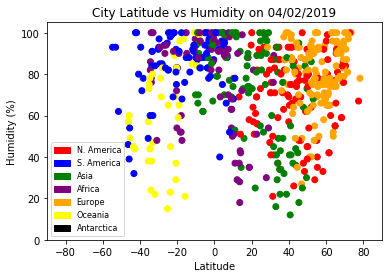

In [6]:
#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2.Humidity, color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red', label='N. America')
SA = mpatches.Patch(color='blue', label='S. America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Humidity on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-90,90])
plt.ylim([0,105])

#Save the image to a file
plt.savefig('output/Humidity.png')

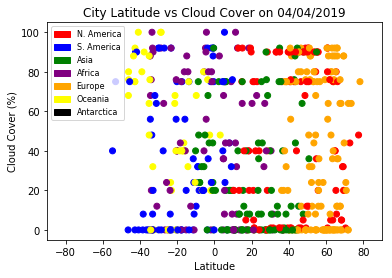

In [11]:
#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2['Cloud Cover'], color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='N. America')
SA = mpatches.Patch(color='blue', label='S. America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Cloud Cover on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.xlim([-90,90])
plt.ylim([-5,105])

#Save the image to a file
plt.savefig('output/Clouds.png')

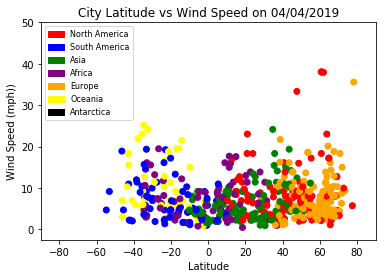

In [12]:
#Plot the graph and add a mapped list of colors by continent
plt.scatter(data2.Latitude, data2['Wind Speed'], color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='North America')
SA = mpatches.Patch(color='blue', label='South America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Latitude vs Wind Speed on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim([-90,90])
plt.ylim([-2.5,50])

#Save the image to a file
plt.savefig('output/Wind.png')

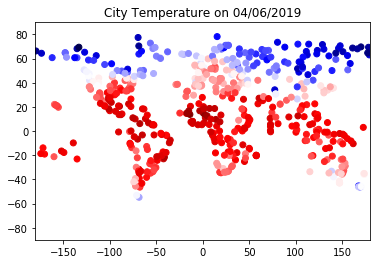

<Figure size 1080x1080 with 0 Axes>

In [27]:
#Plot the graph and add a mapped list of colors by continent
cmap = plt.cm.get_cmap('seismic')
plt.scatter(data2.Longitude, data2.Latitude, c=data2.Temperature, cmap=cmap)

#Use the patches to create a legend, add titles, labels and plot sizes
#plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City Temperature on {date}")
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.figure(figsize=(15,15))
#Save the image to a file
plt.savefig('output/TempMap.png')

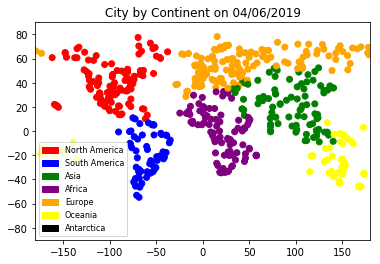

<Figure size 1080x1080 with 0 Axes>

In [28]:
#Plot the graph and add a mapped list of colors by continent
#cmap = plt.cm.get_cmap('seismic')
plt.scatter(data2.Longitude, data2.Latitude, color=list(data2['Continent'].map(colors)))

#Create patches which can be imported to label the legend, since all the data is technically one series
NA = mpatches.Patch(color='red',label='North America')
SA = mpatches.Patch(color='blue', label='South America')
AS = mpatches.Patch(color='green', label='Asia')
AF = mpatches.Patch(color='purple', label='Africa')
EU = mpatches.Patch(color='orange', label='Europe')
OC = mpatches.Patch(color='yellow', label='Oceania')
AN = mpatches.Patch(color='black', label='Antarctica')

#Use the patches to create a legend, add titles, labels and plot sizes
plt.legend(handles=[NA, SA, AS, AF, EU, OC, AN], prop={'size': 8})
plt.title(f"City by Continent on {date}")

plt.xlim([-180,180])
plt.ylim([-90,90])
plt.figure(figsize=(15,15))
#Save the image to a file
plt.savefig('output/ContMap.png')